In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [42]:
data = pd.read_csv('../raw_data/data_for_ml.csv',index_col=0)

In [43]:
data.sample(15)

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6
UserID,,,,,,,,,,,,,,,,,,,,,
396.0,Personal website: www.mariliisalgma.com\n\nExp...,Senior Product Designer at Delivery Hero • 9+ ...,"Berlin, Berlin, Germany",delivery hero,Senior Product Designer,NaN,"Berlin, Germany · Hybrid",Sep 2023 - Present,6 mos,"NewStore, Inc.",...,Interaction Design,NaN,Visual Design,NaN,Mobile Design,NaN,User Flows,NaN,Wireframing,21.0
346.0,🧍‍♀️Product Manager with over 8 years of exper...,🤸‍♀️ Senior Product Manager @ Urban Sports Club,"Berlin, Berlin, Germany",urban sports club,Senior Product Manager,NaN,"Berlin, Germany",Aug 2023 - Present,8 mos,Bloom,...,Digital Marketing,31.0,Social Media Marketing,23.0,Web Project Management,21.0,Online Advertising,22.0,Digital Strategy,16.0
56.0,Goal-oriented person with more than 9 years ex...,Senior Poduct Manager | web3 enthusiast | laun...,"Berlin, Berlin, Germany",notabene,Senior Product Manager,Skills: Product Strategy · Key Performance Ind...,NaN,Sep 2022 - Present,1 yr 6 mos,StarsCrowding,...,Industry standards,32.0,Conversion Optimization,32.0,Key Performance Indicators,54.0,Communication,76.0,Documentation,32.0
640.0,I have intentionally shaped my career around m...,Product Director @ Airalo,"Berlin, Berlin, Germany",airalo,Product Director,Airalo is the world's first and largest eSIM P...,"Berlin, Germany",Nov 2022 - Present,1 yr 5 mos,Vestiaire Collective,...,Web Analytics,28.0,E-business,23.0,E-commerce,23.0,User Experience,10.0,Strategy,9.0
86.0,"As a product manager, I am focused on making a...",Product Manager | Passionate about Driving Imp...,"Berlin, Berlin, Germany",eshop guide,Product Manager,• Coordinating a cross-functional team in laun...,Metropolregion Berlin/Brandenburg,Jan 2023 - Present,1 yr 3 mos,DigitalService,...,Kampagnenmanagement,32.0,App-Entwicklung,NaN,Einführung neuer Produkte,NaN,Soziale Wirkung,64.0,Produktmanagement,NaN
175.0,NaN,Product Manager,"Berlin, Berlin, Germany",babbel,Product Manager,NaN,"Berlin, Germany",Oct 2022 - Present,1 yr 6 mos,Bitwala,...,Cascading Style Sheets (CSS),21.0,Data Visualization,21.0,SQL,21.0,Microsoft Office,7.0,Business Analysis,7.0
227.0,NaN,Senior Product Manager at HeyJobs,Berlin Metropolitan Area,heyjobs,Senior Product Manager,NaN,NaN,Sep 2020 - Present,3 yrs 7 mos,HeyJobs,...,Start-ups,19.0,Project Management Office (PMO),15.0,Sales Operations,2.0,Business Analysis,NaN,Corporate Finance,18.0
537.0,"An enthusiastic, adaptive and open-minded pers...",Marketing Analyst,Germany,mytheresa.com,Marketing Analyst,Skills: Business Process · Business Insights ·...,"Munich, Bavaria, Germany · Hybrid",Jul 2022 - Present,1 yr 9 mos,HelloFresh,...,Key Performance Indicators,21.0,Business Process,32.0,Build Strong Relationships,21.0,Presentations,21.0,Economics,21.0
420.0,"I am Matthias Siwy, founder and CEO of nocodea...",CEO @ nocodeapes | building software 10x faste...,"Berlin, Berlin, Germany",nocodeapes,"founder, CEO & silverback 🦍","At nocodeapes, we're on a mission to redefine ...","Berlin, Deutschland · Remote",Nov 2022 - Present,1 yr 4 mos,aboDeinauto,...,Teamführung,75.0,Operative Exzellenz,108.0,Automatisierung,75.0,Künstliche Intelligenz (KI),21.0,Projektmanagement,108.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 512.0 to 23.0
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   description         344 non-null    object 
 1   headline            469 non-null    object 
 2   location            469 non-null    object 
 3   company             468 non-null    object 
 4   jobTitle            467 non-null    object 
 5   jobDescription      316 non-null    object 
 6   jobLocation         413 non-null    object 
 7   jobDateRange        464 non-null    object 
 8   jobDuration         463 non-null    object 
 9   company2            461 non-null    object 
 10  jobTitle2           460 non-null    object 
 11  jobDescription2     382 non-null    object 
 12  jobLocation2        394 non-null    object 
 13  jobDuration2        460 non-null    object 
 14  school              459 non-null    object 
 15  schoolDegree        452 non-null    object 
 16  schoolDe

In [45]:
# merge columns to a metadata column
# Specify the columns to merge
data.fillna("", inplace=True)
#columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'schoolDegree', 'skill1', 'skill2', 'skill3','skill4', 'skill5', 'skill6']
columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'skill1', 'skill2', 'skill3']
# Merge specified columns into one column
data['metadata'] = data[columns_to_merge].apply(lambda row: ' '.join(row), axis=1)

/tmp/ipykernel_313954/214941109.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("", inplace=True)


In [46]:
data.sample(10)

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
UserID,,,,,,,,,,,,,,,,,,,,,
686.0,Digital product designer with a background in ...,Digital Product Designer and Art Director at r...,Berlin Metropolitan Area,room seven,Product Designer,,"Berlin, Germany",Apr 2021 - Present,3 yrs,Cee Cee Creative,...,,UIUX,,User Experience Design (UED),,UX Research,,User Interface Design,,Digital Product Designer and Art Director at r...
516.0,🚀 Agile Coach | 🧠 Systemischer Coach | 👨‍💼 Lea...,Leveraging Systemic Thinking for Agile Coachin...,Berlin Metropolitan Area,europace ag,Lead Agile Coach,,,Aug 2021 - Present,2 yrs 7 mos,Peter Rubarth,...,1.0,Scrum,35.0,Agile Methoden,19.0,Software Development,8.0,Software Project Management,7.0,Leveraging Systemic Thinking for Agile Coachin...
405.0,"As a product manager at Blockpit, I lead the d...",Product Manager @ Blockpit | WealthTech & Gree...,"Berlin, Berlin, Germany",blockpit ag,Product Manager,Crypto Tax Calculation Engine & Digital Asset ...,"Berlin, Berlin, Germany",2022 - Present,2 yrs 3 mos,Trade Republic,...,2.0,Software Product Management,1.0,Data Product Management,,Software as a Service (SaaS),,Application Programming Interfaces (API),,Product Manager @ Blockpit | WealthTech & Gree...
169.0,,product at powerus (YC S20),"Berlin, Berlin, Germany",powerus,Product Management,Building the #1 career platform for skilled bl...,"Berlin, Germany",Oct 2022 - Present,1 yr 5 mos,Layer,...,,,,,,,,,,product at powerus (YC S20) Product Managemen...
163.0,,Product Manager,"Berlin, Berlin, Germany",contentful,Product Manager,,"Berlin, Germany · On-site",Oct 2023 - Present,5 mos,Contentful,...,8.0,Public Speaking,7.0,Teamwork,11.0,Microsoft Excel,7.0,Italian,11.0,Product Manager Product Manager Senior Busin...
173.0,Well well! \n\nWelcome on my profile ;),Product Manager @StepStone // Systemic Agile C...,"Berlin, Berlin, Germany",stepstone,Product Manager // Content-based Matching and ...,⌲ Managing multiple services/products for Cont...,"Berlin, Deutschland",Dec 2021 - Present,2 yrs 4 mos,Product Development Institute – PRODEVI,...,24.0,Product Owner,25.0,Product Development,15.0,OKR,28.0,Scrum Master,28.0,Product Manager @StepStone // Systemic Agile C...
432.0,Experienced Test Manager with 10+ years of exp...,Test Management l Bridging Requirements to Hig...,"Berlin, Berlin, Germany",fanap,Product Manager,"Prominent ICT Co in the Middle East with 7,000...","Tehran, Iran",Mar 2020 - Jul 2023,3 yrs 5 mos,FANAP,...,1.0,Bug Tracking,31.0,System Testing,21.0,Regression Testing,21.0,BABOK,21.0,Test Management l Bridging Requirements to Hig...
205.0,,Co-Founder at Dogo App,"Berlin, Berlin, Germany",dogo - your dog's favourite app,Co-Founder,- Fundraising\n- Growth\n- Performance Marketi...,"Berlin und Umgebung, Deutschland",Jan 2019 - Present,5 yrs 3 mos,WeSource.io,...,6.0,Business Development,5.0,Strategy,6.0,Start-ups,3.0,Project Management,10.0,Co-Founder at Dogo App Co-Founder - Fundraisi...
618.0,Designer & Problem Solver | CS Student | Aimin...,Making Interfaces Sexier - UI/UX/Dev,"Berlin, Berlin, Germany",a.t.e.m. management gmbh,Web Designer,Skills: Web Design · Cascading Style Sheets (C...,"Berlin, Germany",Aug 2022 - Present,1 yr 7 mos,Freelance,...,,JavaScript,2.0,Cascading Style Sheets (CSS),2.0,Front-End Development,1.0,Wireframing,1.0,Making Interfaces Sexier - UI/UX/Dev Designer ...


In [47]:
import re # REGEX
import string 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# [] ---> character set (match any character in the set)
# ^ ---> starting with 
# [^ ] ---> negated set (match any character that is NOT in the set)
# \w ---> special class called "word characters". It is shorthand for [a-zA-Z0-9_]
# + ---> match as many times as possible (greedy quantifier)
# ? ---> match as few characters as possible (lazy quantifier)
# +? ---> match one character at once

def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Removing whitespaces
    sentence = sentence.strip()

    # 2. Lowercasing
    sentence = sentence.lower()

    # 3. Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # remove tags
    sentence = re.sub('<[^<]+>', "", sentence)

    # 4. Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
        
    #5 remove non-alpha characters
    sentence = sentence.replace(r'[^a-zA-Z\s]', '')
    
    return sentence

In [48]:
data['metadata'] = data.metadata.apply(basic_cleaning)

In [49]:
data

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
UserID,,,,,,,,,,,,,,,,,,,,,
512.0,Experienced professional with the ability to c...,"General Manager - US Finance, Legal, HR, Accou...","Carrollton, Texas, United States",orbis systems,"General Manager, Orbis International Technolog...",A highly driven professional leading the US op...,"Carrollton, Texas, United States",May 2022 - Present,1 yr 10 mos,Texas Instruments,...,21.0,Strategic Planning,21.0,Forecasting,21.0,Organizational Development,21.0,Business Strategy,21.0,general manager us finance legal hr accountin...
652.0,"I am a Product Owner at World Simplified UG, a...",Tech product support intern at Holidu,"Berlin, Berlin, Germany",holidu,Tech product support intern,,"Munich, Bavaria, Germany · Hybrid",Oct 2023 - Present,5 mos,World Simplified UG,...,,Team Leadership,,Cross-functional Team Leadership,1.0,Project Planning,21.0,Business Development,,tech product support intern at holidu i am a p...
618.0,Designer & Problem Solver | CS Student | Aimin...,Making Interfaces Sexier - UI/UX/Dev,"Berlin, Berlin, Germany",a.t.e.m. management gmbh,Web Designer,Skills: Web Design · Cascading Style Sheets (C...,"Berlin, Germany",Aug 2022 - Present,1 yr 7 mos,Freelance,...,,JavaScript,2.0,Cascading Style Sheets (CSS),2.0,Front-End Development,1.0,Wireframing,1.0,making interfaces sexier uiuxdev designer pr...
96.0,,Product & Growth,"Berlin, Berlin, Germany",clink,Chief Experience Officer,,"Berlin, Germany",Sep 2023 - Present,6 mos,OptioPay Group (now Clink),...,40.0,Cross-functional Team Leadership,3.0,Business Development,33.0,Mobile Applications,10.0,Mobile Technology,35.0,product growth chief experience officer chi...
194.0,As a product marketing manager at the JetBrain...,Product marketing manager at JetBrains | Mentor,"Berlin, Berlin, Germany",jetbrains,Product Marketing Manager,,"Berlin, Germany",Oct 2021 - Present,2 yrs 5 mos,Product Marketing Alliance,...,8.0,Marketing Communications,8.0,Customer Insight,13.0,Market Analysis,12.0,Marketing Research,11.0,product marketing manager at jetbrains mentor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279.0,I am an iOS Engineer with 8+ years of Swift an...,Senior iOS Developer,"Berlin, Berlin, Germany",trade republic,iOS Developer,Here I was working on the Trade Republic app. ...,"Berlin, Germany",Sep 2022 - Feb 2024,1 yr 6 mos,Tinkoff,...,,Code Review,,Auto Layout,,Model-view-viewmodel (MVVM),,UIKit,3.0,senior ios developer i am an ios engineer with...
85.0,PMP-certified technical Project manager and pr...,Product owner at Diconium,"Berlin, Berlin, Germany",diconium,Project Manager,Skills: Fachgespräche · E-Commerce · Project M...,"Berlin, Germany",Jan 2021 - Present,3 yrs 3 mos,Синимекс,...,21.0,Kundenerfahrung,32.0,Interfacedesign,,Dokumentation,32.0,Produktmanagement,43.0,product owner at diconium pmpcertified technic...
403.0,Experienced Product Management leader with a s...,Chief Product Officer @ Hygraph | Product Lead...,Berlin Metropolitan Area,hygraph,Chief Product Officer,,Metropolregion Berlin/Brandenburg · Hybrid,Sep 2023 - Present,7 mos,Acquirepad,...,26.0,SaaS,24.0,Leadership,11.0,Software Engineering,21.0,Software Development,54.0,chief product officer hygraph product leader...


In [50]:
from nltk import word_tokenize

stop_words = set(stopwords.words('english')) 

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords


def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string


In [51]:
data['metadata'] = data.metadata.apply(remove_stopwords)

data[['metadata']]

,metadata
UserID,
512.0,"[general, manager, us, finance, legal, hr, acc..."
652.0,"[tech, product, support, intern, holidu, produ..."
618.0,"[making, interfaces, sexier, uiuxdev, designer..."
96.0,"[product, growth, chief, experience, officer, ..."
194.0,"[product, marketing, manager, jetbrains, mento..."
...,...
279.0,"[senior, ios, developer, ios, engineer, years,..."
85.0,"[product, owner, diconium, pmpcertified, techn..."
403.0,"[chief, product, officer, hygraph, product, le..."


In [52]:
data['metadata'] = data.metadata.apply(lemma)
data[['metadata']]

,metadata
UserID,
512.0,general manager u finance legal hr accounting ...
652.0,tech product support intern holidu product own...
618.0,making interface sexier uiuxdev designer probl...
96.0,product growth chief experience officer chief ...
194.0,product marketing manager jetbrains mentor pro...
...,...
279.0,senior io developer io engineer year swift obj...
85.0,product owner diconium pmpcertified technical ...
403.0,chief product officer hygraph product leader a...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['metadata'])
count_df = pd.DataFrame(count_matrix.toarray(), index=data.index.tolist())
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6454,6455,6456,6457,6458,6459,6460,6461,6462,6463
512.0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
count_df

,0,1,2,3,4,5,6,7,8,9,...,6454,6455,6456,6457,6458,6459,6460,6461,6462,6463
512.0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
403.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.decomposition import TruncatedSVD

In [56]:
# Apply SVD
svd = TruncatedSVD(n_components=80)
latent_df = svd.fit_transform(count_df)


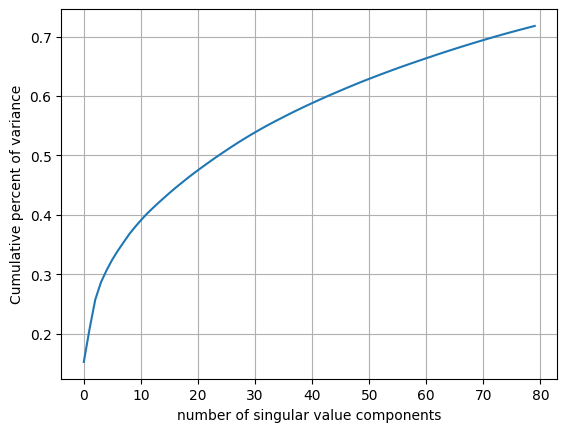

In [57]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [58]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/shubhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/shubhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/shubhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/shubhi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [59]:
# Apply SVD
svd = TruncatedSVD(n_components=15)
latent_df = svd.fit_transform(count_df)

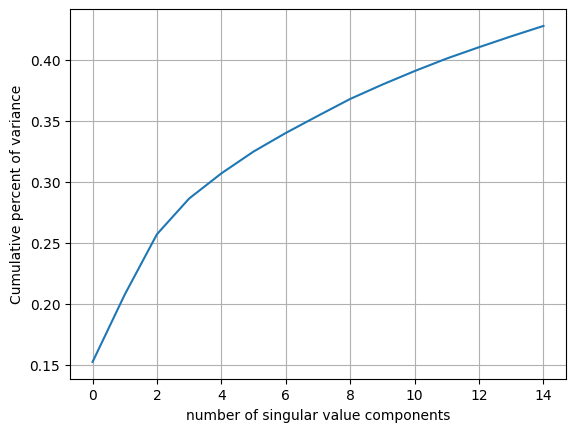

In [60]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [61]:
latent_df.shape

(469, 15)

In [62]:
svd.get_feature_names_out()

array(['truncatedsvd0', 'truncatedsvd1', 'truncatedsvd2', 'truncatedsvd3',
       'truncatedsvd4', 'truncatedsvd5', 'truncatedsvd6', 'truncatedsvd7',
       'truncatedsvd8', 'truncatedsvd9', 'truncatedsvd10',
       'truncatedsvd11', 'truncatedsvd12', 'truncatedsvd13',
       'truncatedsvd14'], dtype=object)

In [63]:
latent_df

array([[ 3.54034914,  0.31402073, -0.28197403, ..., -1.43265079,
         1.14983721, -1.11302377],
       [16.24540506, -1.4291986 ,  0.63042781, ...,  1.84311604,
         0.69064468,  1.10294316],
       [ 2.55880125,  3.59263291, -2.65379296, ...,  1.38037481,
        -1.22242707,  0.63661515],
       ...,
       [ 6.88286765, -1.63179515,  0.91193242, ..., -0.580353  ,
         0.76077675, -0.35338908],
       [ 1.01794741,  0.40791073, -0.33908838, ..., -0.15174735,
         0.32975471,  0.08772388],
       [ 8.60175102, -0.63300828,  0.2782076 , ...,  2.16572796,
         0.92315442,  0.39384971]])

### Changes by Shubhi | Implementing cosine Similartiy | To get the similar 10 users based on meta data | Can be used in prediction 

In [106]:
data.index

Index([512.0, 652.0, 618.0,  96.0, 194.0, 446.0, 376.0, 619.0, 571.0, 480.0,
       ...
       218.0,  34.0, 595.0,   7.0, 654.0, 279.0,  85.0, 403.0, 255.0,  23.0],
      dtype='float64', name='UserID', length=469)

In [107]:
latent_df = pd.DataFrame(latent_df, index = data.index)

In [108]:
latent_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
UserID,,,,,,,,,,,,,,,
512.0,3.540349,0.314021,-0.281974,5.113537,-2.640760,-1.666487,2.194955,1.158399,-0.101857,0.730158,1.619243,-0.040177,-1.432651,1.149837,-1.113024
652.0,16.245405,-1.429199,0.630428,-0.930173,-0.909286,-0.751058,2.005483,-0.650062,0.803133,1.110509,-1.227056,0.156691,1.843116,0.690645,1.102943
618.0,2.558801,3.592633,-2.653793,1.617989,-2.474529,2.595157,-0.653748,0.173571,1.128520,-1.302384,0.482336,-0.691126,1.380375,-1.222427,0.636615
96.0,2.261228,-0.075985,-0.075649,-0.224454,-0.137300,0.505204,-0.046019,0.299485,-0.677397,-0.654150,-0.309110,0.244002,-0.537828,-0.006178,0.172010
194.0,9.640685,-0.735037,0.018988,0.708351,-0.979392,2.174606,-4.440383,3.540699,-3.891246,1.014160,-1.104121,1.186953,3.076166,-0.146519,1.335567


In [109]:
# 469 data points with truncated SVD 15 components
latent_df.shape

(469, 15)

In [78]:
np.array(latent_df.iloc[0]).shape

(15,)

In [81]:
a = np.array(latent_df.iloc[0]).reshape(1, -1)

In [82]:
a.shape

(1, 15)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity of a particular user (1st user, whose id = 512) with the others in the list
sim1 = cosine_similarity(latent_df, a).reshape(-1)
sim1


array([ 1.00000000e+00,  4.15157633e-01,  2.83409911e-01,  3.01999548e-01,
        2.39157425e-01,  2.41396896e-01,  3.72724674e-01,  3.66420674e-01,
        5.11464215e-02,  3.30163557e-01,  3.61122596e-01,  5.53823952e-01,
        1.09310777e-01,  3.25773391e-01,  2.39775808e-01,  6.63238118e-01,
        2.54917698e-01,  4.57025951e-01,  3.05572445e-01,  3.30557233e-01,
        2.16231186e-01,  2.53694928e-01,  3.50306159e-01,  4.08927343e-01,
        4.25461306e-01,  4.45906494e-01,  3.35346334e-01,  4.66185700e-01,
        4.12083738e-01, -1.12484051e-02,  2.86737378e-01,  2.88652825e-01,
        3.56502958e-01,  7.75699318e-02,  3.50270170e-01,  6.08195858e-01,
        2.63287298e-01,  3.52159586e-01,  4.38344813e-01,  3.95507805e-02,
        7.42542531e-01,  2.49681903e-01,  7.58727479e-01,  5.43116422e-01,
        2.28835083e-01,  4.23473395e-01,  4.98249146e-01,  4.76883221e-02,
        2.93998790e-01,  3.76417219e-01,  3.42126486e-01,  4.43627580e-01,
        2.69008573e-01,  

In [94]:
sim1.shape

(469,)

In [100]:
recommendation_df = pd.DataFrame(sim1, index = latent_df.index, columns = [512])
recommendation_df

,512
UserID,
512.0,1.000000
652.0,0.415158
618.0,0.283410
96.0,0.302000
194.0,0.239157
...,...
279.0,0.476596
85.0,0.687372
403.0,0.256574


In [102]:
recommendation_df.sort_values(by = 512, ascending=False, inplace=True)
recommendation_df.head(10)

,512
UserID,
512.0,1.000000
139.0,0.903224
564.0,0.888413
357.0,0.865417
596.0,0.822517
7.0,0.808930
207.0,0.807781
522.0,0.801863
168.0,0.772174


In [103]:
recommendation_df.head(10).index

Index([512.0, 139.0, 564.0, 357.0, 596.0, 7.0, 207.0, 522.0, 168.0, 349.0], dtype='float64', name='UserID')

In [105]:
data.loc[recommendation_df.head(10).index]

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
UserID,,,,,,,,,,,,,,,,,,,,,
512.0,Experienced professional with the ability to c...,"General Manager - US Finance, Legal, HR, Accou...","Carrollton, Texas, United States",orbis systems,"General Manager, Orbis International Technolog...",A highly driven professional leading the US op...,"Carrollton, Texas, United States",May 2022 - Present,1 yr 10 mos,Texas Instruments,...,21.0,Strategic Planning,21.0,Forecasting,21.0,Organizational Development,21.0,Business Strategy,21.0,general manager u finance legal hr accounting ...
139.0,Experienced supply chain planner and current M...,ESMT Berlin MBA // Supply chain expert // Expl...,"Berlin, Berlin, Germany",elevate outdoor collective,Senior Supply Planner,• Designed and executed cross-functional proje...,"Seattle, Washington, United States",Nov 2021 - Sep 2022,11 mos,U.S. Forest Service,...,11.0,Leadership Development,10.0,,,,,,,esmt berlin mba supply chain expert exploring ...
564.0,Career development with a strong focus on team...,Team Lead Manager,"Berlin, Berlin, Germany","rms advogados - rocha, marinho e sales",Team Lead Manager,A large company with over 900 professionals lo...,"Fortaleza, Ceará - Brasil · On-site",Oct 2015 - Feb 2020,4 yrs 5 mos,SCU Advogados,...,,Customer Relationship Management (CRM),,Contract Management,,Business Analysis,,Teamwork,,team lead manager career development strong fo...
357.0,Head of PM experienced in leading various desi...,Head of Project Management at Lazarev.,"Berlin, Berlin, Germany",lazarev. — product design agency,Head Of Project Management,- Planned and implemented strategic decisions ...,,Jan 2021 - Present,3 yrs 2 mos,Lazarev. — Product Design Agency,...,26.0,ESKO Visualizer,1.0,Team Leadership,,Visual Design,,Zoho CRM,,head project management lazarev head pm experi...
596.0,Certified Project Manager with a robust backgr...,Certificated Project Manager | Expertise in Ou...,"Berlin, Berlin, Germany",swaran soft,Software Developer (OutSystems),,India,May 2021 - Nov 2022,1 yr 7 mos,,...,,Product Management,,Scrum,,Computer Science,,Project Delivery,,certificated project manager expertise outsyst...
7.0,As a Manager of Site Reliability Engineering a...,Manager - Site Reliability Engineering @ Red H...,Berlin Metropolitan Area,red hat,Manager - Site Reliability Engineering,"• Led, nurtured, and maintained a diverse team...","Berlin, Germany · Remote",Jan 2022 - Present,2 yrs 3 mos,Red Hat,...,4.0,Distributed Systems,1.0,Engineering Management,2.0,Cloud Computing,,Kubernetes,15.0,manager site reliability engineering red hat l...
207.0,"As a collaborative leader, I am dedicated to d...","Senior Project Manager | Communication, Cultur...","Berlin, Berlin, Germany",career break,Relocation,"Relocation from Wellington, New Zealand to Ber...","Berlin, Berlin",Jul 2023 - Present,9 mos,Stantec,...,2.0,Strategy,2.0,Goal Setting,2.0,Analytical Skills,74.0,Project Cost,74.0,senior project manager communication culture s...
522.0,"Analytical, multifaceted, and detail-oriented ...",Junior Commercial Development Manager - Babbel,"Mannheim, Baden-Württemberg, Germany",babbel,Junior Commercial Development Manager,,Hybrid,Feb 2023 - Present,1 yr 1 mo,Babbel,...,,Revenue Analysis,,Amplitude Analytics,,Tableau,,Financial Modeling,6.0,junior commercial development manager babbel a...
168.0,✔️Developed and launched the first interactive...,Founder @ refle-X-tions,Berlin Metropolitan Area,"refle-x-tions ""socially focused. technology dr...",Founder,Skills: Innovation Management · Mental Health ...,"Berlin, Germany",May 2023 - Present,11 mos,Freelance,...,,Mental Health Counseling,,Invoice Processing,,Office Administration,1.0,Office Operations,1.0,founder reflextions ✔️developed launched first...


In [110]:
# Compute the cosine similarity of every user with each others in the list (pairwsie similarities betweeen all)
sim_users = cosine_similarity(latent_df, latent_df)
sim_users

array([[1.        , 0.41515763, 0.28340991, ..., 0.25657414, 0.167623  ,
        0.53027798],
       [0.41515763, 1.        , 0.28085502, ..., 0.89036397, 0.11959666,
        0.84487786],
       [0.28340991, 0.28085502, 1.        , ..., 0.18680922, 0.12768459,
        0.41547958],
       ...,
       [0.25657414, 0.89036397, 0.18680922, ..., 1.        , 0.07223463,
        0.75407983],
       [0.167623  , 0.11959666, 0.12768459, ..., 0.07223463, 1.        ,
        0.3322988 ],
       [0.53027798, 0.84487786, 0.41547958, ..., 0.75407983, 0.3322988 ,
        1.        ]])

In [111]:
sim_users.shape

(469, 469)

In [112]:
recommended_users = pd.DataFrame(sim_users, index = data.index, columns = data.index)
recommended_users

UserID,512.0,652.0,618.0,96.0,194.0,446.0,376.0,619.0,571.0,480.0,...,218.0,34.0,595.0,7.0,654.0,279.0,85.0,403.0,255.0,23.0
UserID,,,,,,,,,,,,,,,,,,,,,
512.0,1.000000,0.415158,0.283410,0.302000,0.239157,0.241397,0.372725,0.366421,0.051146,0.330164,...,0.621094,0.382523,0.397027,0.808930,0.317106,0.476596,0.687372,0.256574,0.167623,0.530278
652.0,0.415158,1.000000,0.280855,0.789534,0.710112,0.155217,0.849565,0.768639,0.167238,0.776629,...,0.806976,0.889219,0.894309,0.408328,0.902333,0.403420,0.523283,0.890364,0.119597,0.844878
618.0,0.283410,0.280855,1.000000,0.335544,0.366078,0.562004,0.413046,0.224105,0.736659,0.415801,...,0.153666,0.333542,0.339017,0.325245,0.340331,0.579793,0.338631,0.186809,0.127685,0.415480
96.0,0.302000,0.789534,0.335544,1.000000,0.758822,0.334460,0.649646,0.710708,0.300115,0.607187,...,0.766560,0.940130,0.816492,0.400198,0.860492,0.503283,0.219584,0.763287,-0.015827,0.564130
194.0,0.239157,0.710112,0.366078,0.758822,1.000000,0.614321,0.674496,0.654378,0.149505,0.606252,...,0.580409,0.808918,0.741307,0.272882,0.741096,0.357128,0.397628,0.596590,0.021990,0.633749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279.0,0.476596,0.403420,0.579793,0.503283,0.357128,0.298474,0.338709,0.359215,0.511833,0.546009,...,0.492262,0.369733,0.303067,0.713025,0.336936,1.000000,0.168002,0.146316,0.074106,0.337914
85.0,0.687372,0.523283,0.338631,0.219584,0.397628,0.182216,0.576835,0.487639,0.065979,0.466928,...,0.453113,0.353075,0.555896,0.451022,0.437971,0.168002,1.000000,0.357344,0.211969,0.796429
403.0,0.256574,0.890364,0.186809,0.763287,0.596590,0.089632,0.712509,0.634750,0.058836,0.650381,...,0.633774,0.873441,0.899600,0.282829,0.887815,0.146316,0.357344,1.000000,0.072235,0.754080


In [118]:
X_new = pd.read_csv("../raw_data/predict.csv")
X_new

,headline,description,jobTitle,jobDescription,jobDuration,jobDateRange,jobTitle2,jobDuration2,schoolDateRange,skill1,skill2,skill3
0,"Product Leader, Sustainability enthusiast",Bridging the world of technology and business ...,Head of Product,Spearhead product development and strategy for...,1 yr,Aug 2022 - Jul 2023,Product Lead,8 mos,Sep 2023 - Nov 2023,Management Consulting,Competitive Landscape,Stakeholder Management


In [120]:
X_new['metadata'] = X_new[columns_to_merge].apply(lambda row: ' '.join(row), axis=1)


In [121]:
X_new['metadata'] = X_new.metadata.apply(basic_cleaning)

In [122]:
X_new['metadata'] = X_new.metadata.apply(remove_stopwords)


In [123]:
X_new['metadata'] = X_new.metadata.apply(lemma)

In [124]:
count_matrix_new = count.transform(X_new['metadata'])

In [125]:
latent_df_new = svd.transform(count_matrix_new)
latent_df_new

array([[17.8510678 , -2.10762221,  0.97408391, -1.66293491,  2.55442726,
         0.50961665,  0.19575381, -2.58114255,  1.80402436,  2.41927848,
         2.32893737,  0.41397723,  0.77783054,  0.48398954,  0.94816792]])

In [126]:
latent_df_new.shape

(1, 15)

In [130]:
latent_df_new_1 = latent_df_new.reshape(1, -1)
latent_df_new_1

array([[17.8510678 , -2.10762221,  0.97408391, -1.66293491,  2.55442726,
         0.50961665,  0.19575381, -2.58114255,  1.80402436,  2.41927848,
         2.32893737,  0.41397723,  0.77783054,  0.48398954,  0.94816792]])

In [131]:
latent_df_new_1.shape

(1, 15)

In [132]:
similarities = cosine_similarity(latent_df_new.reshape(1, -1), latent_df)
similarities


array([[ 3.16825224e-01,  9.42466775e-01,  2.10301241e-01,
         7.30918580e-01,  6.57359182e-01,  9.40223951e-02,
         8.13973653e-01,  7.39418003e-01,  1.60308049e-01,
         6.81368097e-01,  8.43249462e-01,  7.50484305e-01,
         2.52440766e-01,  8.90253477e-01,  8.55068898e-01,
         4.84125752e-01,  3.62313053e-01,  8.51515532e-01,
         8.37651161e-01,  1.86214970e-01,  6.63854986e-01,
         5.94262150e-01,  7.73617166e-01,  5.65061703e-01,
         8.50451265e-01,  9.39687991e-01,  5.24669803e-01,
         7.12565976e-01,  9.33383588e-01, -2.40832042e-02,
         5.49967187e-01,  2.53495982e-01,  8.20411900e-01,
         6.64789628e-02,  7.30308708e-01,  8.06787025e-01,
         4.58190644e-01,  8.78783920e-01,  9.14793029e-01,
         4.74243134e-01,  6.61882185e-01,  8.91342540e-01,
         5.93667718e-01,  8.59052294e-01,  3.44989401e-01,
         8.41978889e-01,  8.25482681e-01,  2.48053946e-01,
         8.06935659e-01,  8.34038732e-01,  8.22954342e-0

In [134]:
similarities.shape

(1, 469)

In [135]:
similar_users_indices = np.argsort(similarities)[0][::-1]
similar_users_indices[:10]

array([267, 286, 427, 391, 130,   1, 300,  53,  25, 217])

In [136]:
data.iloc[similar_users_indices[:10]]

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
UserID,,,,,,,,,,,,,,,,,,,,,
332.0,Bridging the world of technology and business ...,"Product Leader, Sustainability enthusiast","Berlin, Berlin, Germany",kreatize gmbh,Head of Product,Spearhead product development and strategy for...,"Berlin, Germany · On-site",Aug 2022 - Jul 2023,1 yr,Agoro Carbon Alliance,...,54.0,Stakeholder Management,76.0,Cross-functional Team Leadership,87.0,Problem Solving,109.0,Presentation Skills,65.0,product leader sustainability enthusiast bridg...
171.0,I'm a Product Manager with close to 5 years in...,Product Manager // I build digital product tha...,"Berlin, Berlin, Germany",eqs group,Product Manager,Skills: Business Requirements · English · Mark...,"Munich, Bavaria, Germany",Oct 2021 - Present,2 yrs 6 mos,PASHA Bank OJSC,...,16.0,Product Vision,1.0,Organization Skills,1.0,Logics,,User Interface Design,1.0,product manager build digital product customer...
11.0,“Committed master’s graduate in Big Data and A...,Product @ SAP Signavio | M.Sc Big data and AI,"Berlin, Berlin, Germany",sap signavio,Product Associate,"•\tContributing to the success, quality, cost ...","Berlin, Germany · Remote",Jan 2024 - Present,3 mos,Mister Sandman GmbH,...,,Agile Methodologies,,SAP Enable Now,2.0,Signavio,2.0,Jira,2.0,product sap signavio msc big data ai “ committ...
21.0,An accomplished Analytics Professional with 6 ...,"Data, Machine Learning | Business, Product","Berlin, Berlin, Germany",memasik app,Product Analyst,- Conduct comprehensive market research and ga...,"Kyiv, Kyiv City, Ukraine",Aug 2022 - Jul 2023,1 yr,Memasik app,...,,Deep Learning,,Regression Models,,Statistics,,Algorithms,,data machine learning business product accompl...
50.0,At 12 they called me a child prodigy :)\nDesig...,Product Manager I Creator of AIQ©* I AI Produc...,"Berlin, Berlin, Germany",zalando,Senior Product Manager,B2E: Knowledge Management Products at Zalando\...,"Berlin Area, Germany",Jun 2022 - Present,1 yr 9 mos,Zalando,...,,Digital Strategy,,Digital Health,,Online Moderation,,Moderating,,product manager creator aiq© ai product keynot...
652.0,"I am a Product Owner at World Simplified UG, a...",Tech product support intern at Holidu,"Berlin, Berlin, Germany",holidu,Tech product support intern,,"Munich, Bavaria, Germany · Hybrid",Oct 2023 - Present,5 mos,World Simplified UG,...,,Team Leadership,,Cross-functional Team Leadership,1.0,Project Planning,21.0,Business Development,,tech product support intern holidu product own...
585.0,I am a Product Professional over 12 years of e...,Product Leader in E-commerce and Supply Chain ...,"Berlin, Berlin, Germany",dress for less,Product Management,Skills: Product Development · Product Manageme...,"Berlin, Germany · Remote",Apr 2023 - Present,1 yr,Wayfair,...,4.0,Artificial Intelligence (AI),2.0,prompt writing,1.0,Product Management,8.0,Python,4.0,product leader ecommerce supply chain product ...
436.0,I have 6 years of product & project management...,Product Owner,"Berlin, Berlin, Germany",intenseye,Product Owner,,"Berlin, Germany · Remote",Sep 2023 - Present,6 mos,TalentGrid,...,2.0,User Research,32.0,Agile Software Development,54.0,Team Building,32.0,Requirements Gathering,21.0,product owner year product project management ...
180.0,"I am a Product Manager at shyftplan, a company...",Innovation Maestro and Product Wizard: Transfo...,"Berlin, Berlin, Germany",shyftplan gmbh: ki-unterstützte schichtplanung,Sr. Product Manager,"I am a Product Manager at shyftplan, a company...","Berlin, Germany · On-site",Apr 2023 - Present,11 mos,GLG,...,3.0,Timelines,1.0,Sprint Planning,31.0,Scrum,53.0,Growth Strategies,31.0,innovation maestro product wizard transforming...
